In [1]:
## module import
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import DataFrame #데이터 전처리 

from statsmodels.tsa.seasonal import seasonal_decompose # decompose
from statsmodels.tsa.stattools import adfuller # stationary test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #AutoCorrelation , Partial AutoCorrelation
import itertools # 보간
from statsmodels.tsa.arima_model import ARIMA # SARIMA랑 다른 패키지
import statsmodels.api as sm # statsmodels


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/train.csv')
test = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/test.csv')
# submission = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/submission.csv')

In [4]:
test.shape

(8760, 201)

In [5]:
test['Time'] = test['Time'].apply(pd.to_datetime)
test.set_index('Time',inplace=True)

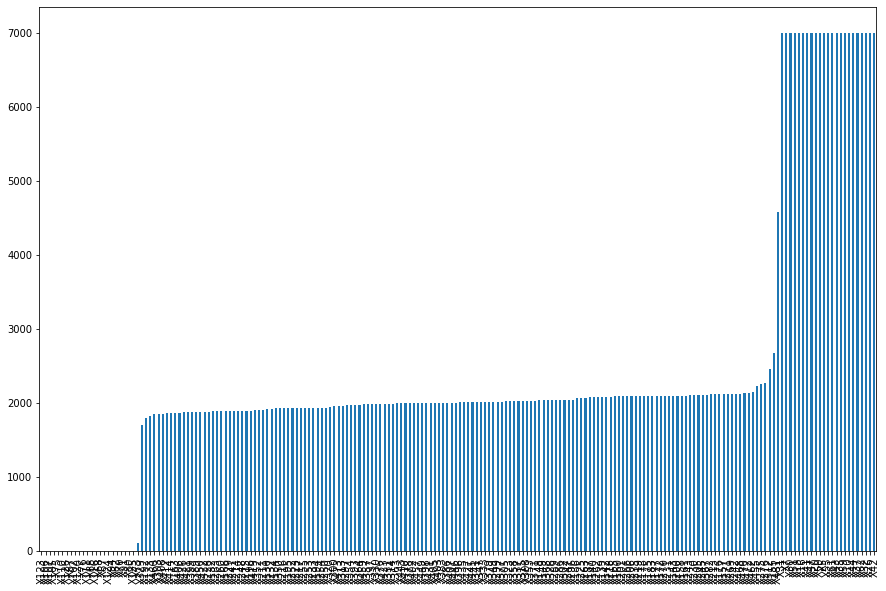

In [6]:
test.isnull().sum().sort_values(ascending=True).plot(kind='bar',figsize=(15,10))

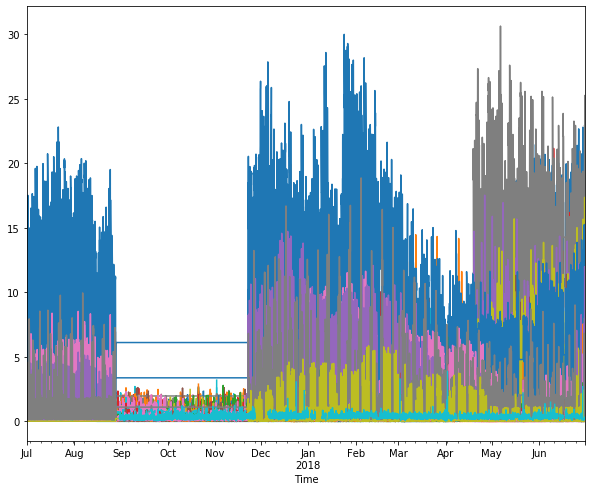

In [13]:
test.plot(figsize=(10,8),legend=False)

In [31]:
test[['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107']]['2017-08-28-02':'2017-11-21']

,X125,X76,X106,X94,X123,X111,X67,X91,X87,X126,...,X88,X116,X68,X124,X82,X80,X102,X70,X75,X107
Time,,,,,,,,,,,,,,,,,,,,,
2017-08-28 02:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-08-28 03:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-08-28 04:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-08-28 05:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-08-28 06:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-21 19:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-11-21 20:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225
2017-11-21 21:00:00,0.726,0.463,0.652,0.179,1.107,0.445,0.75,0.238,1.973,0.175,...,0.356,0.602,3.379,1.155,0.65,6.113,0.806,0.632,1.109,0.225


In [21]:
## 결측치가 없는 세대
test.loc[:,test.isnull().sum()==0].columns

Index(['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107'],
      dtype='object')

In [8]:
# sample 데이터
test_sample = test[['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107']]

In [9]:
# 일
test_sample_day = test[['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107']].resample(rule='D').sum()

# 월
test_sample_month = test[['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107']].resample(rule='M').sum()

# 시간별
test_sample_hours = test[['X125', 'X76', 'X106', 'X94', 'X123', 'X111', 'X67', 'X91', 'X87',
       'X126', 'X120', 'X110', 'X105', 'X88', 'X116', 'X68', 'X124', 'X82',
       'X80', 'X102', 'X70', 'X75', 'X107']]

In [ ]:
test

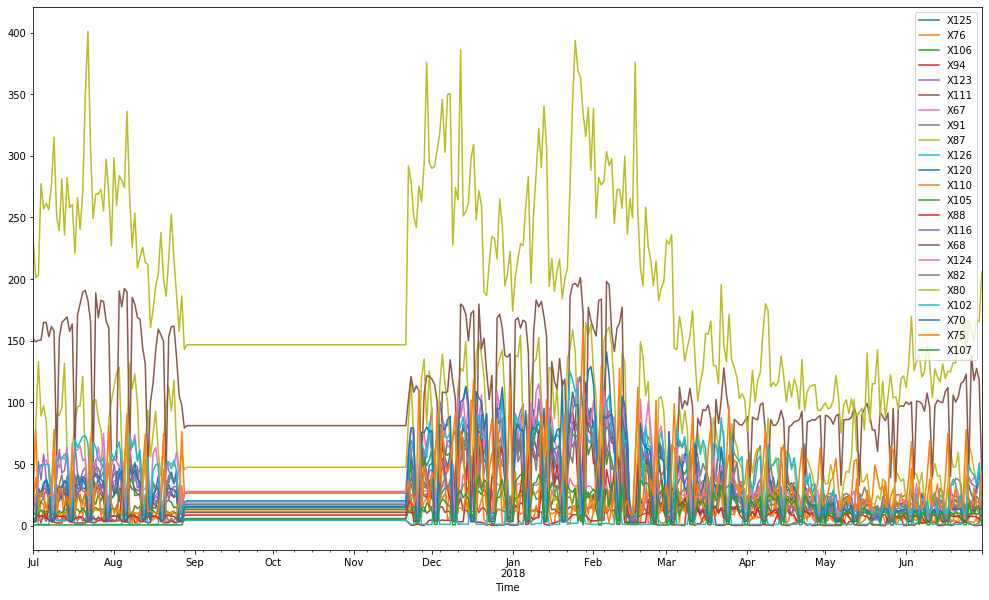

In [11]:
# 일별 시각화
test_sample_day.plot(figsize=(17,10))

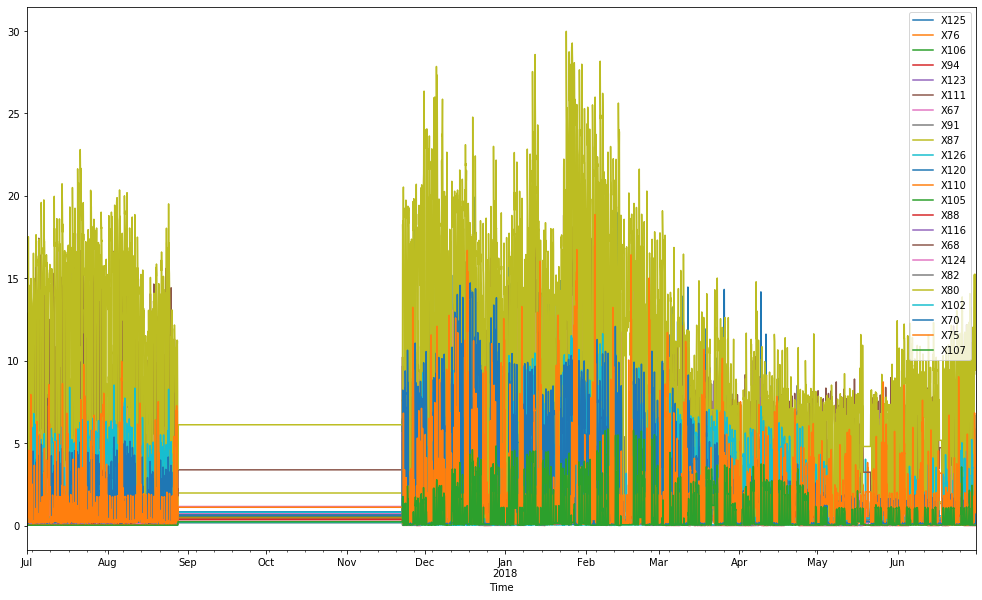

In [11]:
# 시간별 시각화

test_sample_hours.plot(figsize=(17,10))

In [12]:
# X125 세대로 모델링 테스트

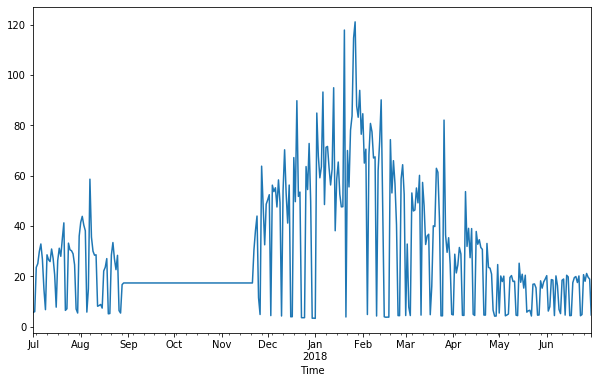

In [13]:
test_sample_day['X125'].plot(figsize=(10,6))

<Figure size 432x288 with 0 Axes>

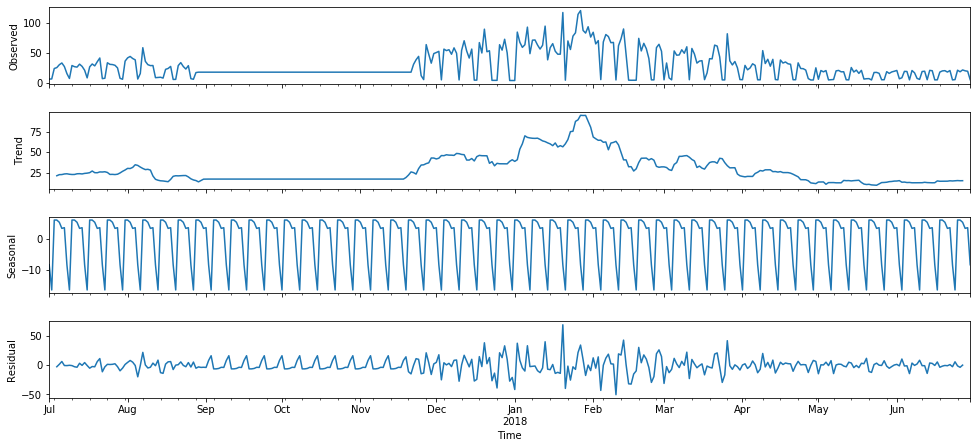

In [14]:
# decompose
decomposition = seasonal_decompose(test_sample_day['X125'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,7)

In [15]:
# differencing 함수로 만들기
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else :
        print('Non-Stationary {}'.format(result[1]))

In [16]:
adf_check(test_sample_day['X125'])

Non-Stationary 0.5358707611611337


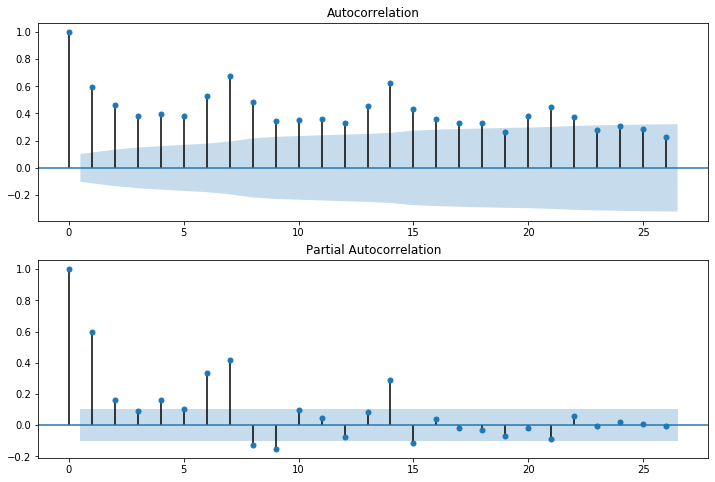

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(test_sample_day['X125'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(test_sample_day['X125'], ax=ax2, method='ywm')

In [29]:
## seasonal ARIMA 적용

In [32]:
import warnings

In [33]:
# p=d=q=range(0,5)

# pdq = list(itertools.product(p,d,q))

# seasonal_pdq = [(x[0],x[1],x[2],9) for x in list(itertools.product(p,d,q))]

# warnings.filterwarnings('ignore')

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model = sm.tsa.statespace.SARIMAX(test_sample_day2,
#                                  order=param,
#                                  seasonal_order=param_seasonal,
#                                  enforce_stationarity=False,
#                                  enforce_invertibility=False)
#             results = model.fit()
#             print('ARIMA{}x{} - AIC :{}'.format(param,param_seasonal,results.aic))
#         except:
#             continue

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


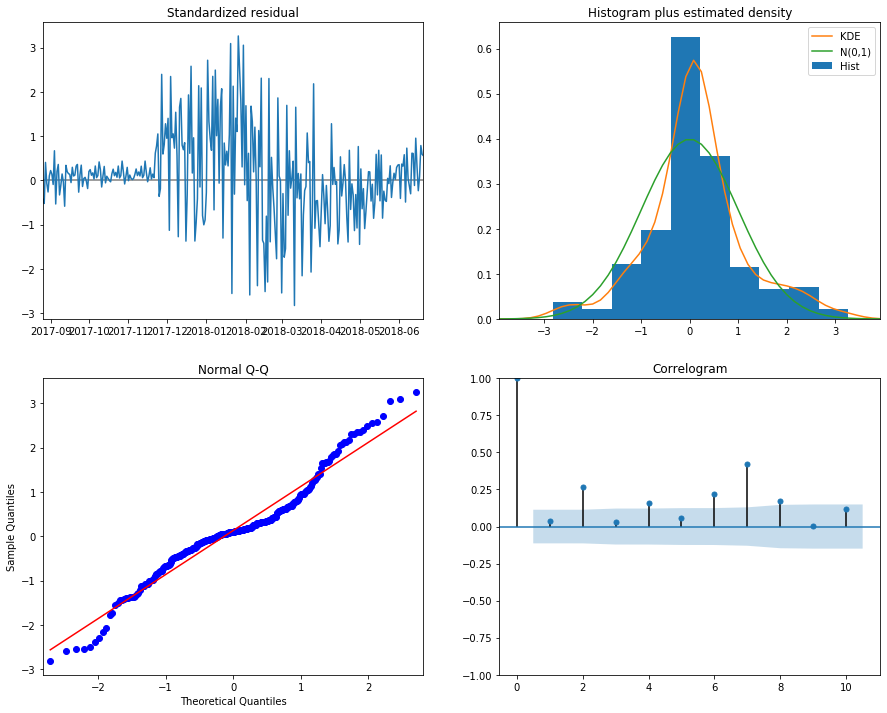

In [34]:
# 정해진 p,q,d(P,Q,D)로 Seasonal ARIMA모델 fittning

model = sm.tsa.statespace.SARIMAX(test_sample_day2,
                                 order=(0,0,1),
                                 seasonal_order=(2,2,4,9),
                                 trend='t',
                                 enforce_stationarity=False,
                                 enforece_stationarity=False)

results = model.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()